In [ ]:
import numpy as np

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
        
    def forward(self, input):
        pass
    
    def backward(self,output_gradient, learning_rate):
        pass

In [ ]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
        
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    
    def backward(self, output_gradient, input_gradient):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        
        return input_gradient

In [ ]:
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

In [ ]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [ ]:
class Tanh(Activation):
    def __init__(self):
        def tanh(x):
            return np.tanh(x)
        
        def tanh_prime(x):
            return 1- np.tanh(x) ** 2
        
        super().__init__(tanh, tanh_prime)
        
        
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1-s)
        
        super().__init__(sigmoid, sigmoid_prime)

In [ ]:
import math

In [ ]:
class Linear(Activation):
    def __init__(self):
        def linear(x):
            return x
        
        def linear_prime(x):
            return 1
        
        super().__init__(linear, linear_prime)

In [ ]:
X = np.linspace(-3,3,61)
Y = [math.sin(p) for p in X]

network = [
    Dense(1, 10),
    Tanh(),
    Dense(10, 1),
    Linear()
]

epochs = 10
learning_rate = 0.1
errorlist = []

for e in range(epochs):
    error = 0
    for x,y in zip(X,Y):
        output = x
        for layer in network:
            output=layer.forward(output)
        error += mse(y,output)
        grad = mse_prime(y,output)

        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    error /= len(X)
    print(f"{e + 1}/({epochs}, error={error}")
    errorlist.append(error)

1/(10, error=1.557546717962512
2/(10, error=0.015753345853621623
3/(10, error=0.13513999720034872
4/(10, error=0.21043633080642352
5/(10, error=0.08631083833144564
6/(10, error=0.10485617061254346
7/(10, error=0.06492512135811643
8/(10, error=0.06057768049742285
9/(10, error=0.048353789779371985
10/(10, error=0.042320154292793684


In [ ]:
# X

In [ ]:
# Y

In [ ]:
actual_Y = []
for x in X:
    output = x
    for layer in network:
        output=layer.forward(output)
    actual_Y.append(output[0])
    print(output)

[[-1.23133712]]
[[-1.23900826]]
[[-1.24708128]]
[[-1.2555439]]
[[-1.26437077]]
[[-1.27351917]]
[[-1.28292367]]
[[-1.29248933]]
[[-1.30208317]]
[[-1.31152367]]
[[-1.32056776]]
[[-1.32889503]]
[[-1.33608892]]
[[-1.34161473]]
[[-1.34479466]]
[[-1.34478094]]
[[-1.34052874]]
[[-1.33077226]]
[[-1.31400945]]
[[-1.288503]]
[[-1.25230839]]
[[-1.20334121]]
[[-1.13949679]]
[[-1.05883085]]
[[-0.95980138]]
[[-0.841556]]
[[-0.70422934]]
[[-0.54919534]]
[[-0.37920785]]
[[-0.19836578]]
[[-0.01186117]]
[[0.17448953]]
[[0.35486809]]
[[0.52409616]]
[[0.67811569]]
[[0.8141659]]
[[0.93064764]]
[[1.02681675]]
[[1.10249857]]
[[1.15793459]]
[[1.19374658]]
[[1.21093699]]
[[1.21085948]]
[[1.19514311]]
[[1.16559035]]
[[1.12407748]]
[[1.07247668]]
[[1.01260532]]
[[0.94619814]]
[[0.87489377]]
[[0.80022734]]
[[0.72362312]]
[[0.64638457]]
[[0.56968169]]
[[0.49453754]]
[[0.42181675]]
[[0.35221851]]
[[0.28627574]]
[[0.22436114]]
[[0.16669946]]
[[0.11338473]]


In [ ]:
import matplotlib.pyplot as plt

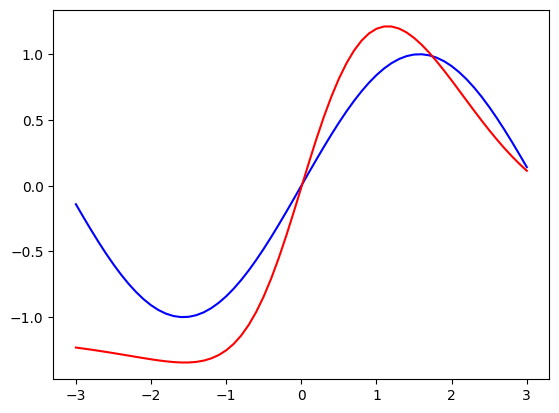

In [ ]:
plt.plot(X,Y,color='blue')
plt.plot(X, actual_Y,color='red')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

In [ ]:
def preprocess_data(x, y, limit):
        x = x.reshape(x.shape[0], 28 * 28, 1)
        x = x.astype("float32")/255
        
        y = np_utils.to_categorical(y)
        y = y.reshape(y.shape[0], 10, 1)
        
        return x[:limit], y[:limit]

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 10000)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [ ]:
# network = [
#     Dense(784, 80),
#     Sigmoid(),
#     Dense(80, 10),
#     Sigmoid()
# ]

network = [
    Dense(784, 80),
    Tanh(),
    Dense(80, 10),
    Tanh()
]

epochs = 100
learning_rate = 0.1
errorlist = []

for e in range(epochs):
    error = 0
    for x,y in zip(x_train,y_train):
        output = x
        for layer in network:
            output=layer.forward(output)
        error += mse(y,output)
        grad = mse_prime(y,output)

        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    error /= len(x)
    print(f"{e + 1}/({epochs}, error={error}")
    errorlist.append(error)

1/(100, error=10.40599150058036
2/(100, error=7.667544563356428
3/(100, error=2.288099612035926
4/(100, error=1.7660266788742502
5/(100, error=1.6210822551998243
6/(100, error=1.5084359642312641
7/(100, error=1.4272098028349667
8/(100, error=1.3642780093282973
9/(100, error=1.3127676706682032
10/(100, error=1.2677788359840005
11/(100, error=1.2279846597149264
12/(100, error=1.1946625482462212
13/(100, error=1.1620917438311915
14/(100, error=1.1307251067280908
15/(100, error=1.1038646021748857
16/(100, error=1.0792058403289924
17/(100, error=1.0534688842699556
18/(100, error=1.0280645307766787
19/(100, error=1.0059261881159842
20/(100, error=0.986625958025481
21/(100, error=0.9690963601794969
22/(100, error=0.9533848015527088
23/(100, error=0.9388460660281713
24/(100, error=0.9249069779815103
25/(100, error=0.9109628771291268
26/(100, error=0.8970777410404206
27/(100, error=0.8842569476188682
28/(100, error=0.8734856264171513
29/(100, error=0.8632591624790801
30/(100, error=0.8532524857

In [ ]:
def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

In [ ]:
!pip install simple-colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import simple_colors

In [ ]:
correct = 0

for x,y in zip(x_test, y_test):
    output = predict(network ,x)
    if np.argmax(output) == np.argmax(y):
        correct += 1
        print('pred:', np.argmax(output), '\ttrue:', np.argmax(y))
    else:
        print(simple_colors.red(f'pred: {np.argmax(output)} \ttrue: {np.argmax(y)}'))
    
accuracy = correct / len(y_test)
print(f"Accuracy: {accuracy}")
print(f"Correct: {correct}")

pred: 7 	true: 7
pred: 2 	true: 2
pred: 1 	true: 1
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 4 	true: 4
pred: 9 	true: 9
pred: 3 	true: 5
pred: 9 	true: 9
pred: 0 	true: 0
pred: 8 	true: 6
pred: 9 	true: 9
pred: 0 	true: 0
pred: 1 	true: 1
pred: 5 	true: 5
pred: 9 	true: 9
pred: 7 	true: 7
pred: 8 	true: 3
pred: 4 	true: 4
pred: 9 	true: 9
pred: 6 	true: 6
pred: 3 	true: 6
pred: 5 	true: 5
pred: 4 	true: 4
pred: 0 	true: 0
pred: 7 	true: 7
pred: 4 	true: 4
pred: 0 	true: 0
pred: 1 	true: 1
pred: 3 	true: 3
pred: 1 	true: 1
pred: 3 	true: 3
pred: 6 	true: 4
pred: 7 	true: 7
pred: 2 	true: 2
pred: 7 	true: 7
pred: 1 	true: 1
pred: 2 	true: 2
pred: 1 	true: 1
pred: 1 	true: 1
pred: 7 	true: 7
pred: 4 	true: 4
pred: 2 	true: 2
pred: 3 	true: 3
pred: 5 	true: 5
pred: 1 	true: 1
pred: 2 	true: 2
pred: 4 	true: 4
pred: 4 	true: 4
pred: 6 	true: 6
pred: 3 	true: 3
pred: 5 	true: 5
pred: 5 	true: 5
pred: 8 	true: 6
pred: 0 	true: 0
pred: 4 	true: 4
pred: 1 	true: 1
pred: 9 	true:

In [ ]:
error = errorlist
X = list(range(1,len(errorlist) + 1))

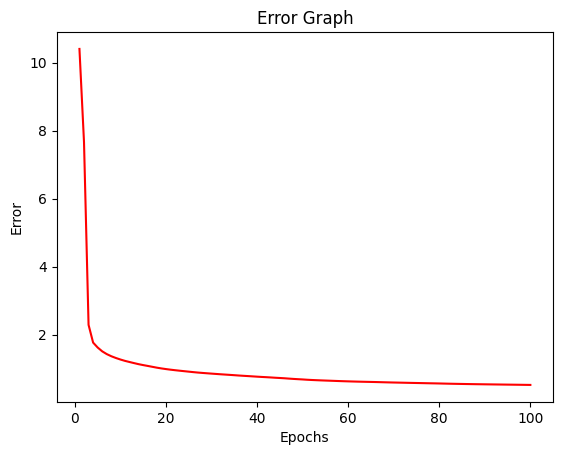

In [ ]:
plt.plot(X, error, color='r')
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Graph")
plt.show()